In [1]:
%load_ext autoreload

%autoreload 2
import numpy as np
import corner, sys
import getdist
from getdist import plots, MCSamples
%matplotlib inline
import matplotlib.pyplot as plt
sys.path.append('../../modules/')
import numpy as np
#plt.switch_backend("Qt5Agg")

In [2]:
names = ['1', '2', '3', '4', '5', '6']
labels = [r'\ln \lambda_0', r'\mu_z', r'\mu_m', r'\sigma_{\ln \lambda, 0}', r'\sigma_z', r'\sigma_m']
settings={'mult_bias_correction_order':0,'smooth_scale_2D':4, 'smooth_scale_1D':4, 'boundary_correction_order':0}

In [3]:
n_cut=19000
name='1-halo=nfw+c-M=None_rmin=1.0-rmax=3.5_photoz=Truez_hmf=Despali16'
t = np.load(f'../chains/MxN/MCMC_fit_m-r_MxN_{name}.pkl', allow_pickle = True)
MxN_NFW = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Navarro-Frenk-White (NFW)')
name='1-halo=hernquist+c-M=None_rmin=1.0-rmax=3.5_photoz=Truez_hmf=Despali16'
t = np.load(f'../chains/MxN/MCMC_fit_m-r_MxN_{name}.pkl', allow_pickle = True)
MxN_hernquist = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Hernquist')
name='1-halo=einasto+c-M=None_rmin=1.0-rmax=3.5_photoz=Truez_hmf=Despali16'
t = np.load(f'../chains/MxN/MCMC_fit_m-r_MxN_{name}.pkl', allow_pickle = True)
MxN_einasto = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Einasto')

Removed no burn in
Removed no burn in
Removed no burn in


In [4]:
name='1-halo=nfw+c-M=Duffy08_+2-halo_rmin=1.0-rmax=10_photoz=Truez_hmf=Despali16'
t = np.load(f'../chains/WLxN/MCMC_fit_m-r_WLxN_{name}.pkl', allow_pickle = True)
WLxN_2h = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='[WLxN] 1h + 2h - [1, 10] Mpc')
name='1-halo=nfw+c-M=Duffy08_+2-halo_rmin=1.0-rmax=3.5_photoz=Truez_hmf=Despali16'
t = np.load(f'../chains/WLxN/MCMC_fit_m-r_WLxN_{name}.pkl', allow_pickle = True)
WLxN_2hshort = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='[WLxN] 1h + 2h - [1, 3.5] Mpc')
name='1-halo=nfw+c-M=Duffy08_rmin=1.0-rmax=3.5_photoz=Truez_hmf=Despali16'
t = np.load(f'../chains/WLxN/MCMC_fit_m-r_WLxN_{name}.pkl', allow_pickle = True)
WLxN_1h = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='[WLxN] 1h - [1, 3.5] Mpc')

Removed no burn in
Removed no burn in
Removed no burn in


In [5]:
params_fid=[3.345953364933381,
 0.06378674560099672,
 2.2274595352385975,
 0.5634900828247924,
 -0.04529427946062734,
 0.09764409931399064]

In [6]:
markers={f'{i+1}':params_fid[i] for i in range(len(params_fid))}

In [7]:
markers

{'1': 3.345953364933381,
 '2': 0.06378674560099672,
 '3': 2.2274595352385975,
 '4': 0.5634900828247924,
 '5': -0.04529427946062734,
 '6': 0.09764409931399064}

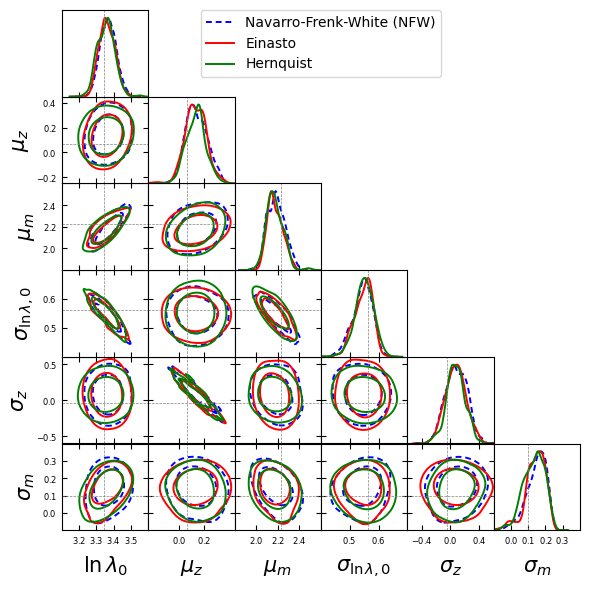

In [ ]:
g = plots.get_subplot_plotter(subplot_size=1)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 15
g.settings.figure_legend_ncol = 1
range_ = {'1':[3.1,3.6], '2':[-0.25,0.45], '3':[1.8,2.6], '4':[0.4,0.7],'5':[-0.6,0.6], '6':[-0.1,0.4], }
g.triangle_plot(
                [MxN_NFW, MxN_einasto, MxN_hernquist, ], 
                filled=[False, False, False, False, False], 
                contour_colors = ['b', 'r', 'g', 'k', 'r', 'k' ], 
                contour_ls=['--','-','-', '-', '-'],
                contour_lws=[1.4,1.4,1.4,1,2],
                legend_fontsize = 10,
                param_limits=range_,
                params=['1','2','3','4','5','6'],markers=markers,
                fine_bins = 1,  marker_args = {'linewidth':10},
                #upper_roots = [WLxN_1h,  WLxN_2hshort, WLxN_2h,],
                #upper_kwargs = {'contour_colors':['C3','C4','C5'], 'contour_ls':['--','-','-']}
)
plt.savefig(f'../fig/mcmc_scaling_relation_{name}_alone_impact_halo_model.png', dpi = 300)